In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [6]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')


print(train.head())
print(test.head())

   ID    Surname  CreditScore Geography  Gender   Age  Tenure    Balance  \
0   1     Martin        727.0     Spain    Male  38.0       2   62276.99   
1   2  Chinweuba        529.0    France  Female  29.0       8       0.00   
2   3      Clapp        589.0    France  Female  50.0       4       0.00   
3   4       Boni        515.0    France    Male  40.0       0  109542.29   
4   5   Jamieson        528.0     Spain    Male  43.0       7   97473.87   

   NumOfProducts HasCrCard IsActiveMember  EstimatedSalary Complain  \
0              1       Yes            Yes         59280.79       No   
1              2       Yes            NaN         19842.11       No   
2              2        No            Yes        182076.97       No   
3              1       Yes            Yes        166370.81       No   
4              2       Yes            Yes        159823.16       No   

   Satisfaction Score Card Type  Point Earned  Exited  
0                   4   DIAMOND           757       0  
1   

In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null   int64  
 16  Exited

In [8]:
train.describe()

,ID,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned,Exited
count,8030.000000,7603.000000,7588.000000,8030.000000,8030.000000,8030.000000,7664.000000,8030.000000,8030.000000,8030.000000
mean,4015.500000,650.572932,38.834212,4.997509,76760.274842,1.530386,99789.518316,3.019054,604.522540,0.199502
std,2318.205664,96.677445,10.553106,2.895015,62436.537619,0.580551,57475.475959,1.409365,226.282724,0.399651
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,91.750000,1.000000,119.000000,0.000000
25%,2008.250000,583.000000,32.000000,3.000000,0.000000,1.000000,50488.107500,2.000000,408.000000,0.000000
50%,4015.500000,651.000000,37.000000,5.000000,97562.950000,1.000000,100088.080000,3.000000,602.000000,0.000000
75%,6022.750000,717.000000,44.000000,7.000000,127849.000000,2.000000,149185.215000,4.000000,799.000000,0.000000
max,8030.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000,1.000000


In [9]:
print(f'Train columns: {train.columns}')
print(f'Test columns: {test.columns}')

Train columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned', 'Exited'],
      dtype='object')
Test columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


In [10]:

numerical_cols = [var for var in train.columns if train[var].dtype != 'object'] # get the numerical columns
categorical_cols = [var for var in train.columns if train[var].dtype == 'object'] # get the categorical columns

print('Numerical columns:')
print(numerical_cols)

Numerical columns:
['ID', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Exited']


In [11]:
print('Categorical columns:')
print(categorical_cols)

Categorical columns:
['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']


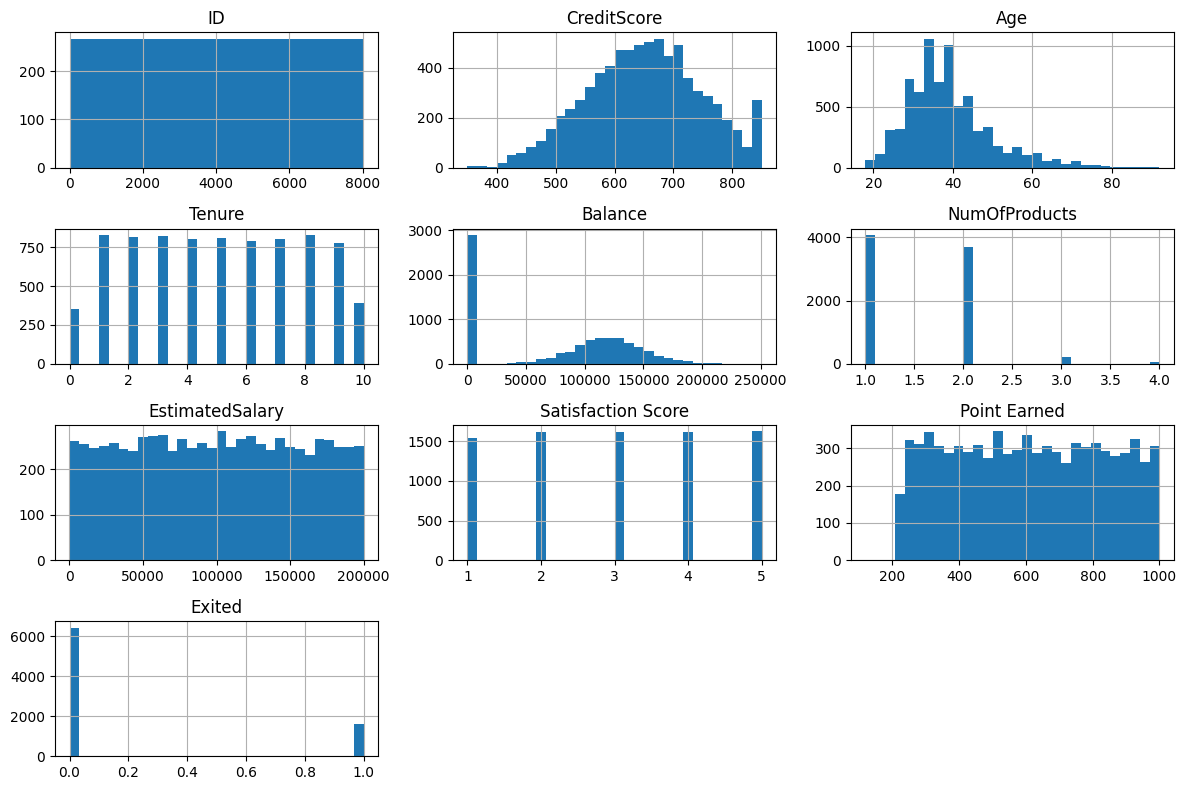

In [12]:
train[numerical_cols].hist(bins=30, figsize=(12,8));
plt.tight_layout()
plt.show()

In [13]:
categorical_cols

['Surname',
 'Geography',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'Complain',
 'Card Type']

In [14]:
k = 'Surname'

while(k in categorical_cols):
    categorical_cols.remove(k)

categorical_cols

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']

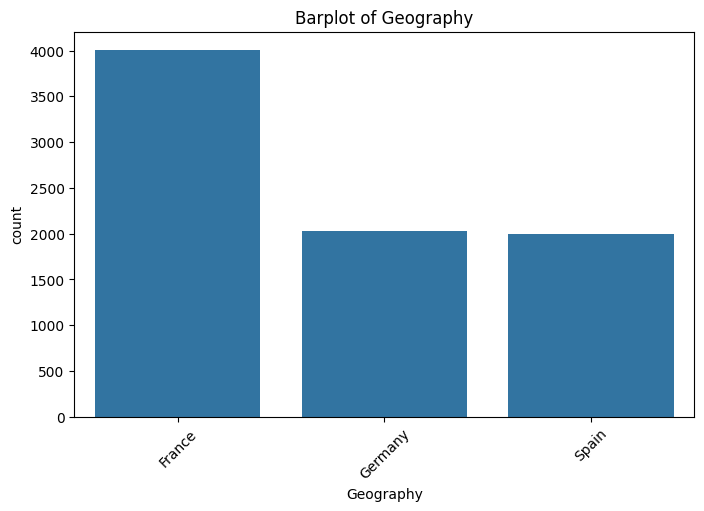

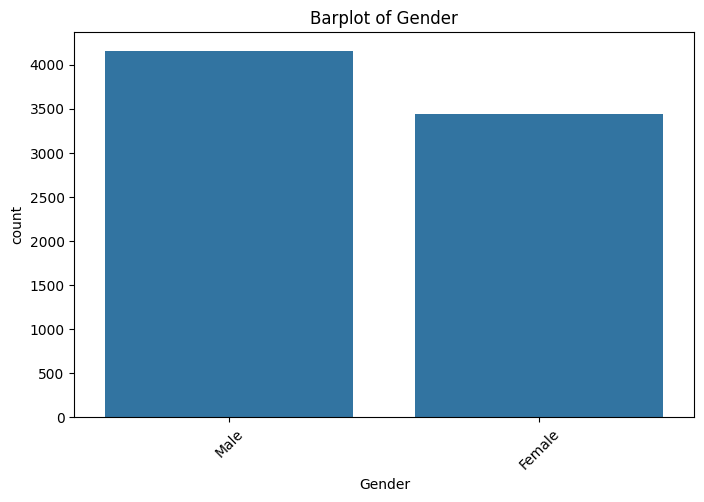

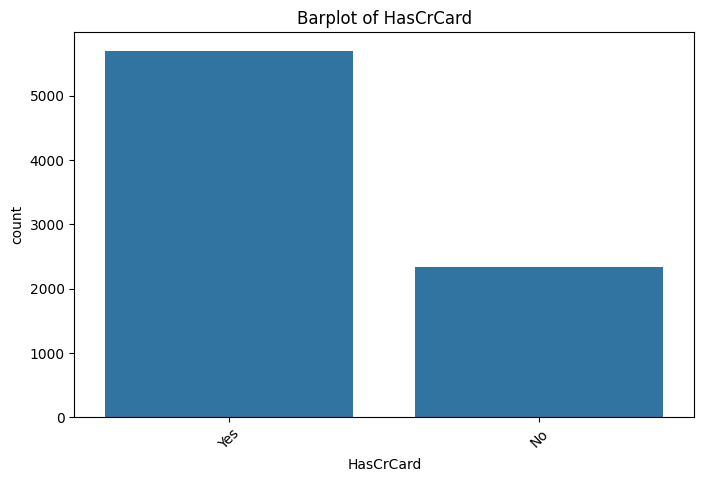

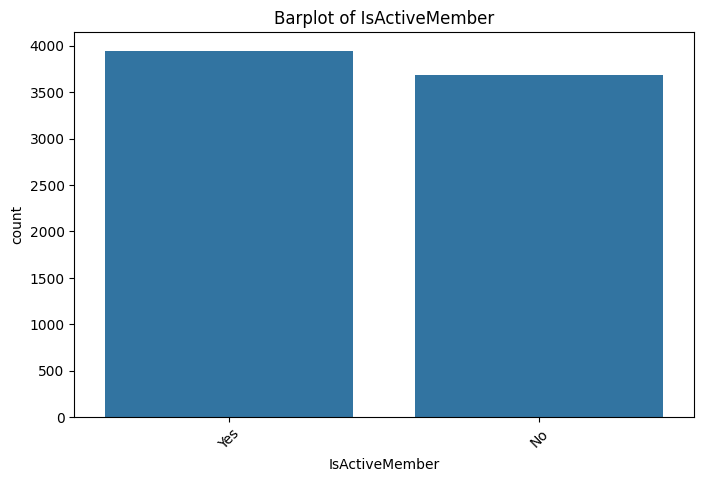

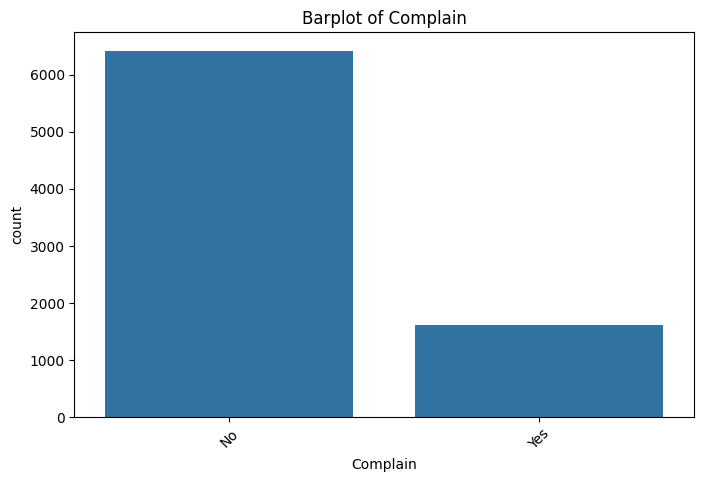

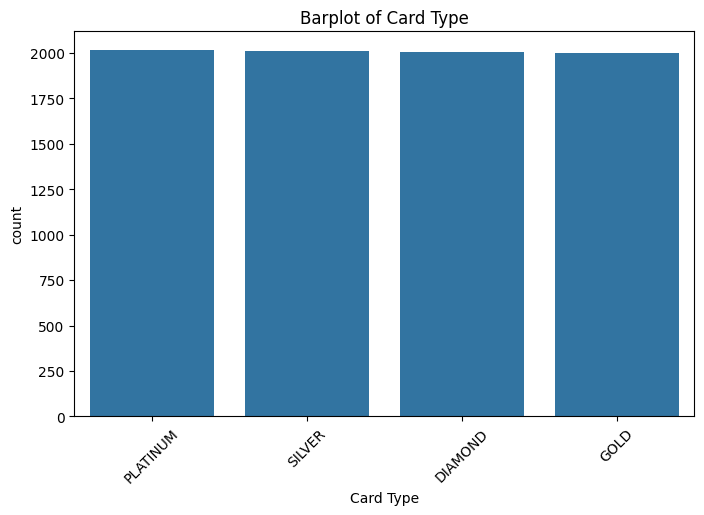

In [15]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f'Barplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [16]:
train2 = train.copy()

for col in categorical_cols:
    le = LabelEncoder()

    train2[col] = le.fit_transform(train2[col])

train2.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,2,1,38.0,2,62276.99,1,1,1,59280.79,0,4,0,757,0
1,2,Chinweuba,529.0,0,0,29.0,8,0.00,2,1,2,19842.11,0,3,3,476,0
2,3,Clapp,589.0,0,0,50.0,4,0.00,2,0,1,182076.97,0,4,2,441,0
3,4,Boni,515.0,0,1,40.0,0,109542.29,1,1,1,166370.81,0,5,1,312,0
4,5,Jamieson,528.0,2,1,43.0,7,97473.87,2,1,1,159823.16,0,3,2,654,0


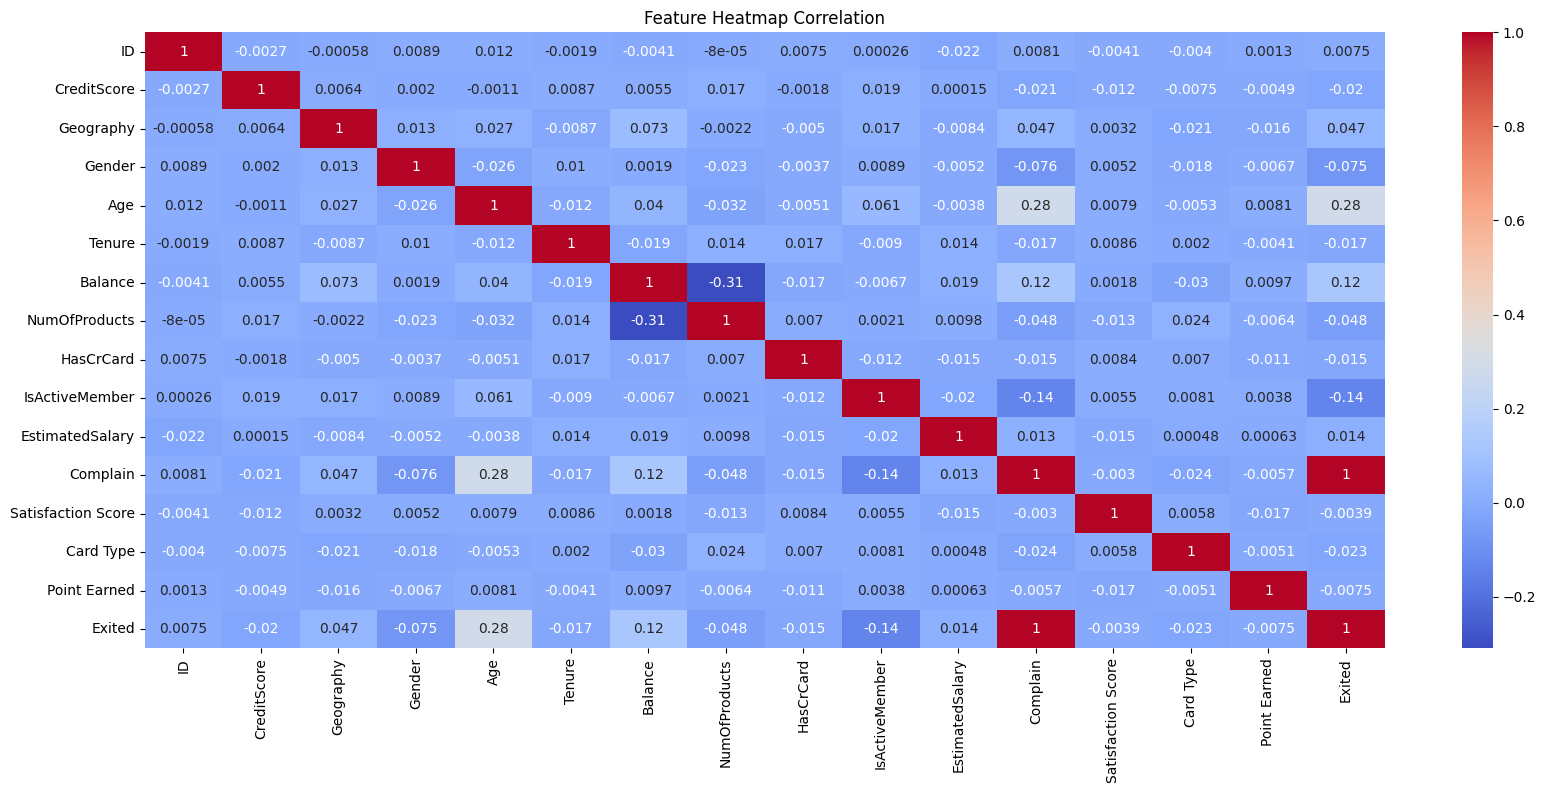

In [17]:
num_corr = train2.drop('Surname', axis=1).corr()

plt.figure(figsize=(20,8))
sns.heatmap(num_corr, annot=True, cmap='coolwarm')
plt.title('Feature Heatmap Correlation')
plt.show()

In [18]:
train.isna().sum().sort_values(ascending=False)

,0
Age,442
CreditScore,427
Gender,423
IsActiveMember,402
EstimatedSalary,366
ID,0
Point Earned,0
Card Type,0
Satisfaction Score,0
Complain,0


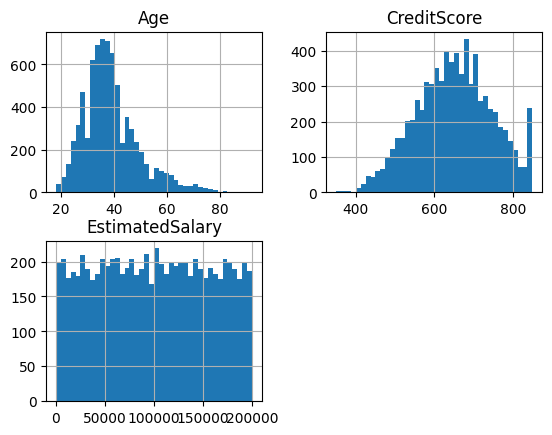

In [19]:
train[['Age', 'CreditScore', 'EstimatedSalary']].hist(bins=40);

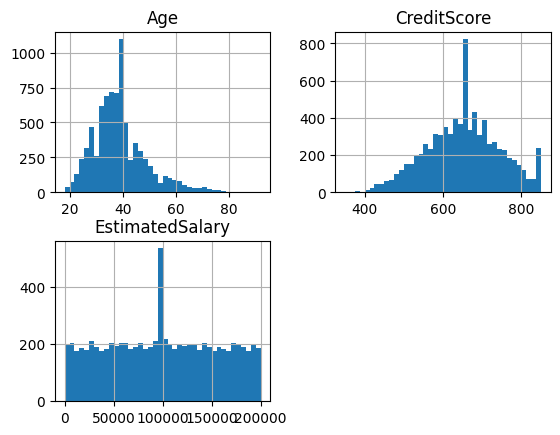

In [20]:
# Filling missing values
for col in ['Age', 'CreditScore', 'EstimatedSalary']:
    train[col].fillna(train[col].mean(), inplace=True)

train[['Age', 'CreditScore', 'EstimatedSalary']].hist(bins=40);

In [21]:
train.isna().sum().sort_values(ascending=False)

,0
Gender,423
IsActiveMember,402
ID,0
HasCrCard,0
Point Earned,0
Card Type,0
Satisfaction Score,0
Complain,0
EstimatedSalary,0
NumOfProducts,0


In [22]:
train.duplicated().sum()

0

In [23]:
for col in categorical_cols:
    print(train[col].value_counts())
    print('-'*50)

Geography
France     4006
Germany    2027
Spain      1997
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      4162
Female    3445
Name: count, dtype: int64
--------------------------------------------------
HasCrCard
Yes    5700
No     2330
Name: count, dtype: int64
--------------------------------------------------
IsActiveMember
Yes    3948
No     3680
Name: count, dtype: int64
--------------------------------------------------
Complain
No     6422
Yes    1608
Name: count, dtype: int64
--------------------------------------------------
Card Type
PLATINUM    2017
SILVER      2010
DIAMOND     2003
GOLD        2000
Name: count, dtype: int64
--------------------------------------------------


In [24]:
le = LabelEncoder()

for col in categorical_cols:
    le = LabelEncoder()

    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

train.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,2,1,38.0,2,62276.99,1,1,1,59280.79,0,4,0,757,0
1,2,Chinweuba,529.0,0,0,29.0,8,0.00,2,1,2,19842.11,0,3,3,476,0
2,3,Clapp,589.0,0,0,50.0,4,0.00,2,0,1,182076.97,0,4,2,441,0
3,4,Boni,515.0,0,1,40.0,0,109542.29,1,1,1,166370.81,0,5,1,312,0
4,5,Jamieson,528.0,2,1,43.0,7,97473.87,2,1,1,159823.16,0,3,2,654,0


In [25]:
test.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,Ugonna,693,1,1,44,5,124601.58,2,1,1,46998.13,1,2,3,408
1,2002,Nebeolisa,607,1,1,29,7,102609.00,1,1,0,163257.44,0,5,0,800
2,2003,Tsai,689,2,1,73,1,108555.07,1,0,1,167969.15,0,1,2,623
3,2004,Downie,660,0,0,38,5,110570.78,2,1,0,195906.59,0,1,3,472
4,2005,Morehead,503,0,1,38,1,0.00,2,1,1,95153.24,0,2,0,433


In [26]:
if 'ID' in train.columns and 'Surname' in train.columns:
    train.drop(['ID', 'Surname'], axis=1, inplace=True)

train = pd.get_dummies(train, drop_first=True)

X = train.drop('Exited', axis=1)
y = train['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((6424, 14), (6424,), (1606, 14), (1606,))

In [27]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [28]:
y_val

,Exited
6074,0
5958,1
3032,0
6446,0
318,0
...,...
4609,0
2943,0
2441,0
921,1


In [29]:
y_pred_val = best_model.predict(X_val)

print("KNeighborsClassifier Evaluation:")
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

KNeighborsClassifier Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00       308

    accuracy                           1.00      1606
   macro avg       1.00      1.00      1.00      1606
weighted avg       1.00      1.00      1.00      1606

[[1297    1]
 [   1  307]]


RandomForestClassifier Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       0.99      1.00      1.00       308

    accuracy                           1.00      1606
   macro avg       1.00      1.00      1.00      1606
weighted avg       1.00      1.00      1.00      1606



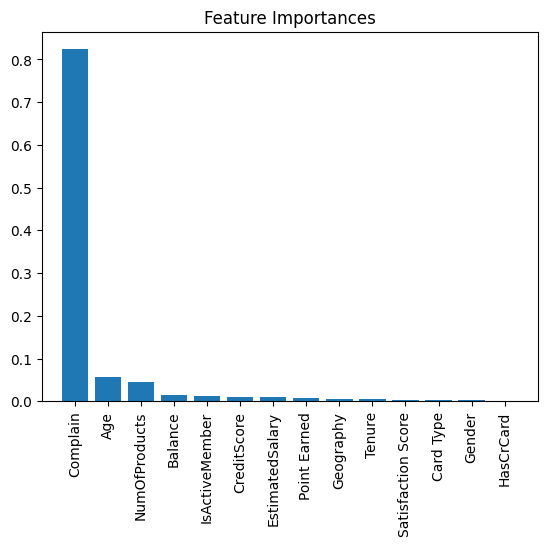

In [30]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_val)
print("RandomForestClassifier Evaluation:")
print(classification_report(y_val, y_pred_rf))

importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [31]:
print(f'F1-score: {f1_score(y_val, y_pred_val)}')

F1-score: 0.9967532467532467


In [32]:
if 'ID' in test.columns and 'Surname' in test.columns:
    test.drop(['ID', 'Surname'], axis=1, inplace=True)

test_scaled = test.copy()

test_scaled = scaler.transform(test_scaled)
test['Exited'] = model_rf.predict(test_scaled)

print(test['Exited'].value_counts())

Exited
0    1556
1     444
Name: count, dtype: int64


In [33]:
submission = pd.read_csv('/content/sample_data/sample_submission.csv')
submission['Exited'] = test['Exited']
submission.to_csv('my_first_submission.csv', index=False)

In [34]:
submission

,ID,Exited
0,2001,1
1,2002,0
2,2003,0
3,2004,0
4,2005,0
...,...,...
1995,3996,1
1996,3997,0
1997,3998,0
1998,3999,0
